# Using Microsoft Cognitive Services for Performing Arabic OCR on scanned images



In [3]:
!pip install azure

  ERROR: Could not find a version that satisfies the requirement azure (from versions: none)
ERROR: No matching distribution found for azure


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests, json

# QFCRA's Home Page

C:\Users\v-ahdebb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  """


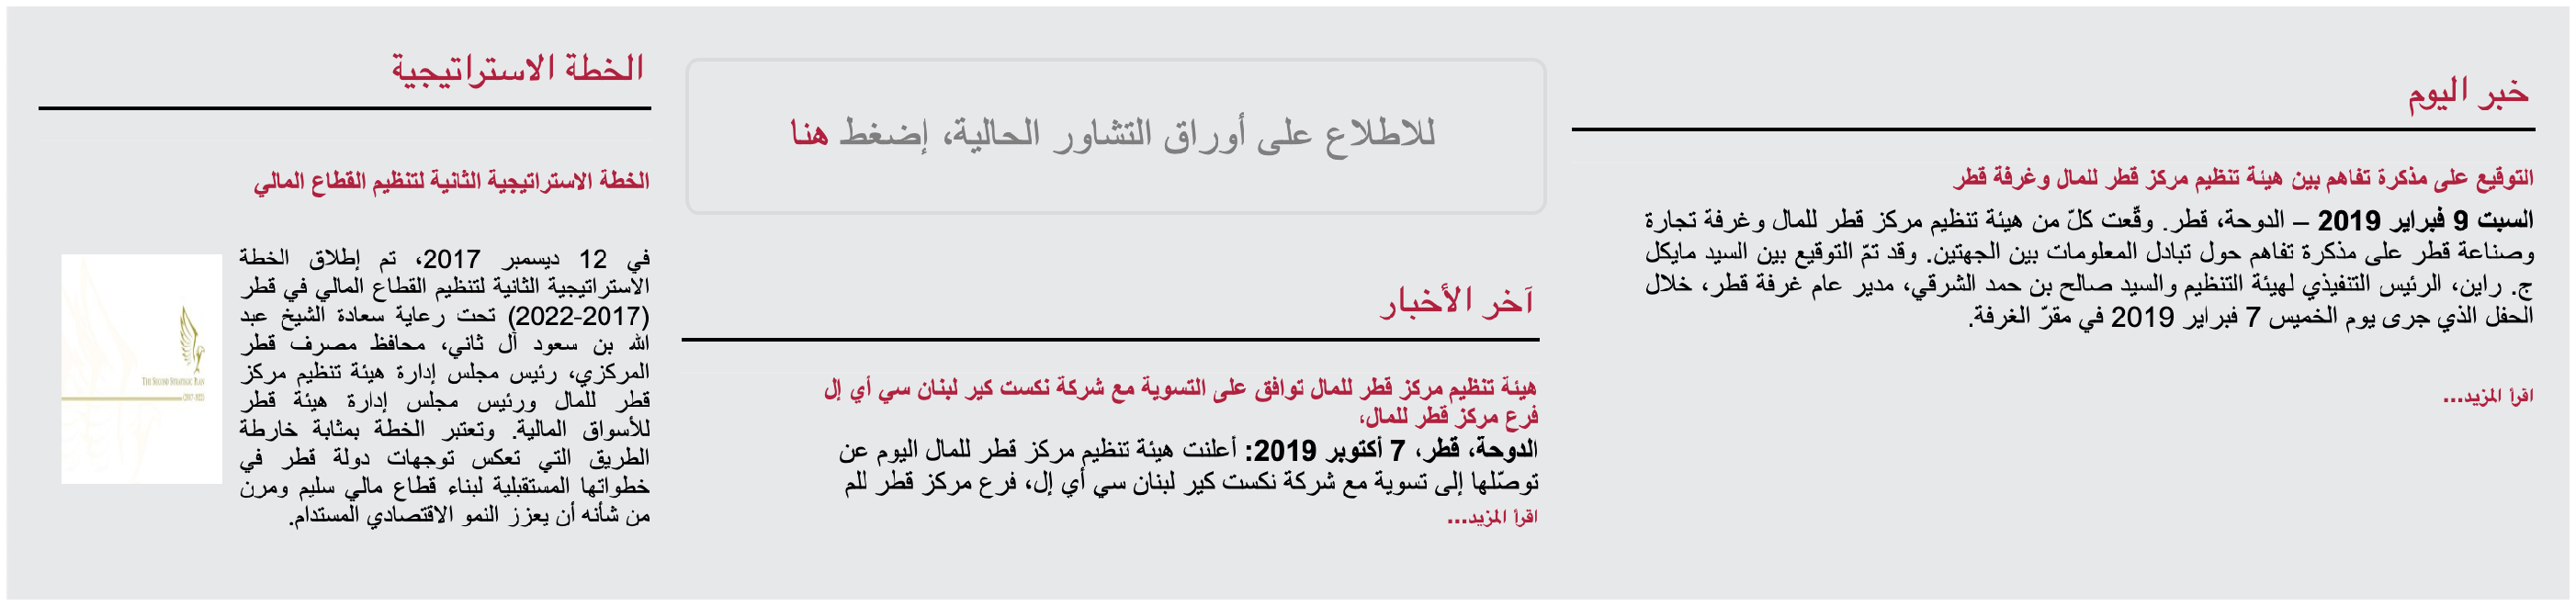

In [2]:
image_url = "https://cognitivestoragemsqr.blob.core.windows.net/cognitive-services-ocr/QFCRA-website.png"

plt.figure(figsize=(50,85))
image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, shape=(120,120))
_ = plt.axis("off")

## Initial Setup

In [3]:
subscription_key = '8b70ead3443f478bb5a4254d94bd8d2e'
vision_base_url = "https://westeurope.api.cognitive.microsoft.com/vision/v2.0/"

assert subscription_key
assert vision_base_url

### Setting up the URLs & parameters

In [4]:
ocr_url = vision_base_url + "ocr"
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'language': 'ar', 'detectOrientation ': 'true'}

## OCR: QFCRA's Home Page

In [8]:
data     = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
# word_infos

#full_text = ''
#word_infos = json.loads(word_infos)
print(word_infos)

#for item in word_infos: 
#    full_text = full_text + ' ' + item['text']
    
#print('Page: \n{}'.format(full_text))

[{'boundingBox': '433,53,181,39', 'text': 'الاستراتيجية'}, {'boundingBox': '629,53,85,28', 'text': 'الخطة'}, {'boundingBox': '279,185,56,29', 'text': 'المالي'}, {'boundingBox': '343,185,60,29', 'text': 'القطاع'}, {'boundingBox': '413,185,57,29', 'text': 'لتنظيم'}, {'boundingBox': '476,182,56,28', 'text': 'الثانية'}, {'boundingBox': '541,182,116,28', 'text': 'الاستراتيجية'}, {'boundingBox': '665,182,56,22', 'text': 'الخطة'}, {'boundingBox': '261,270,56,20', 'text': 'الخطة'}, {'boundingBox': '339,270,56,27', 'text': 'إطلاق'}, {'boundingBox': '419,275,17,25', 'text': 'تم'}, {'boundingBox': '460,272,72,23', 'text': '2017،'}, {'boundingBox': '554,276,66,20', 'text': 'ديسمبر'}, {'boundingBox': '645,272,29,22', 'text': '12'}, {'boundingBox': '697,272,25,28', 'text': 'في'}, {'boundingBox': '263,302,39,27', 'text': 'قطر'}, {'boundingBox': '312,304,25,28', 'text': 'في'}, {'boundingBox': '348,303,52,28', 'text': 'المالي'}, {'boundingBox': '413,302,59,31', 'text': 'القطاع'}, {'boundingBox': '483,3

C:\Users\v-ahdebb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  


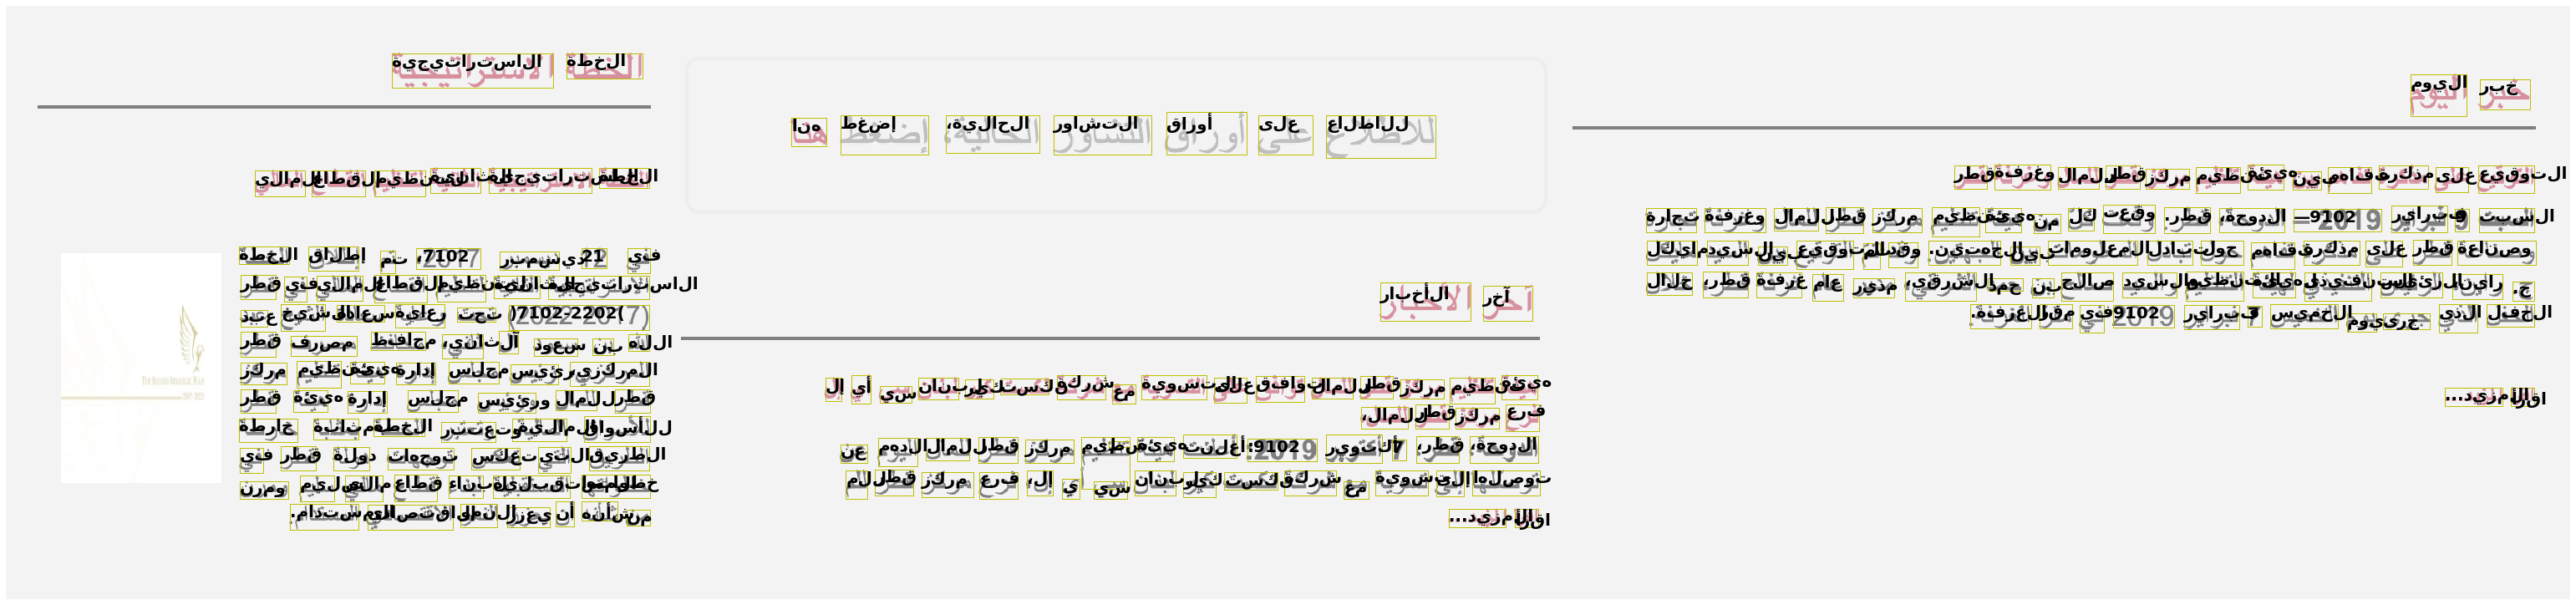

In [10]:
plt.figure(figsize=(55,95))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.5, shape=(120,120))
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"][::-1]
    origin = (bbox[0], bbox[1])
    patch  = mpl.patches.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=1, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")